In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import paper_functions

# Research

## RBM QST

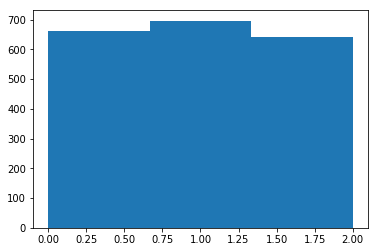

In [252]:
num_units = 3
num_samples = 2000

dataset = utils.dataset_w(num_units, num_samples, hist=True)

In [253]:
occurs, data_hist = utils.dataset_to_hist(dataset)      
occurs

array([662, 696, 642])

In [311]:
data_hist

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [436]:
all_states = utils.get_all_states(num_units)

In [450]:
# r_qst = rbm_qst.RBM_QST(num_units, 3, data_hist)
r_qst = rbm_qst.RBM_QST(num_units, 3, all_states)
r_qst.train(dataset, dataset, max_epochs=2000, learning_rate=0.3, debug=True, precise=True)
# r_qst.train(dataset, dataset, max_epochs=2000, learning_rate=0.1, debug=True, precise=False)

Epoch 0: objective is 2.081417494975931
Epoch 100: objective is 1.9178076582108892
Epoch 200: objective is 1.9153869485741857
Epoch 300: objective is 1.886799977670628
Epoch 400: objective is 1.8177253881256275
Epoch 500: objective is 1.7971910069101547
Epoch 600: objective is 1.8568713740974947
Epoch 700: objective is 1.868167986635219
Epoch 800: objective is 1.751482629199684
Epoch 900: objective is 1.546031369735463
Epoch 1000: objective is 1.3945614836234714
Epoch 1100: objective is 1.3128297949455376
Epoch 1200: objective is 1.2632551923836717
Epoch 1300: objective is 1.2307236107992996
Epoch 1400: objective is 1.2081856331650942
Epoch 1500: objective is 1.191855818257313
Epoch 1600: objective is 1.1795764233598245
Epoch 1700: objective is 1.1700542857887308
Epoch 1800: objective is 1.162478757955376
Epoch 1900: objective is 1.1563211128284532


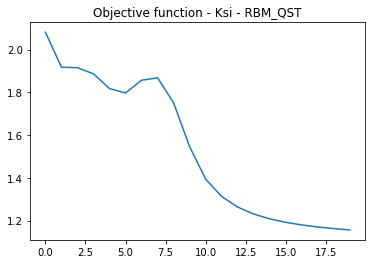

In [451]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [448]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
fid

0.5781829116776768

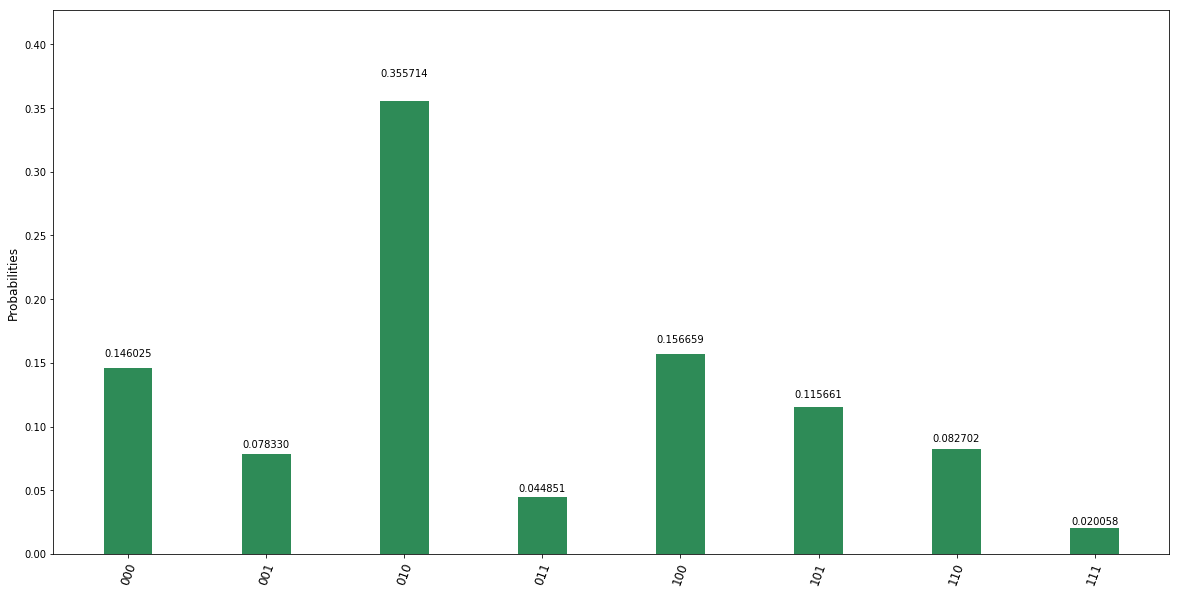

In [449]:
utils.plot_histogram(states)

In [407]:
probs = list()

for i in range(len(data_hist)):
    tmp_data = data_hist[i]
    tmp_data = np.insert(tmp_data, 0, 1, axis=0)
    tmp_prob = paper_functions.p_k(tmp_data, r_qst.weights_lambda)
    probs.append(tmp_prob)
    
probs = np.array(probs)
probs = probs / probs.sum()

In [331]:
probs

array([0.34432203, 0.37440788, 0.28127009])

In [378]:
data_hist.shape[0]

3

In [394]:
data_hist[np.random.choice(data_hist.shape[0], size=20, p=probs)]

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

## Classical RBM

In [33]:
r_cl = rbm_classic.RBM(num_units, 3)

In [34]:
r_cl.train(dataset, max_epochs=3000, learning_rate=0.5, debug=True)

Epoch 0: objective is 2.07779855616
Epoch 100: objective is 1.80282094423
Epoch 200: objective is 1.3365255169
Epoch 300: objective is 1.20543131858
Epoch 400: objective is 1.16658164837
Epoch 500: objective is 1.14799325508
Epoch 600: objective is 1.13807852593
Epoch 700: objective is 1.13062283872
Epoch 800: objective is 1.12540572606
Epoch 900: objective is 1.12188664629
Epoch 1000: objective is 1.11927161324
Epoch 1100: objective is 1.11702147786
Epoch 1200: objective is 1.11537621641
Epoch 1300: objective is 1.11388446548
Epoch 1400: objective is 1.11287358786
Epoch 1500: objective is 1.1117938128
Epoch 1600: objective is 1.11097417293
Epoch 1700: objective is 1.11003126573
Epoch 1800: objective is 1.1093448024
Epoch 1900: objective is 1.10871517086
Epoch 2000: objective is 1.10846335783
Epoch 2100: objective is 1.10792368953
Epoch 2200: objective is 1.10766453252
Epoch 2300: objective is 1.10701727047
Epoch 2400: objective is 1.10674933355
Epoch 2500: objective is 1.10648954668
E

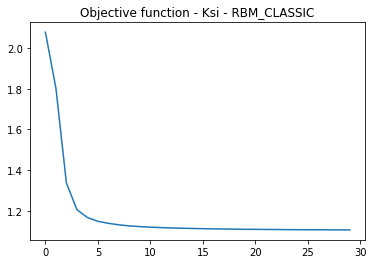

In [35]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [38]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
fid

0.99533147250071241

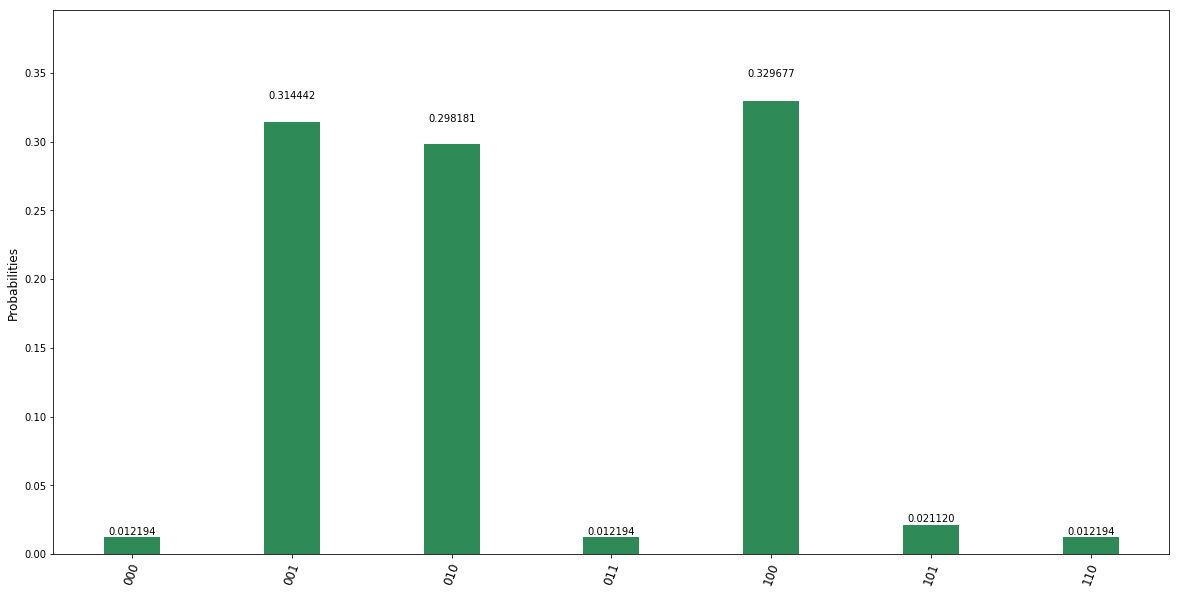

In [39]:
utils.plot_histogram(states)

# Plot Fig.1 b

In [19]:
import tqdm

num_units = 3
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


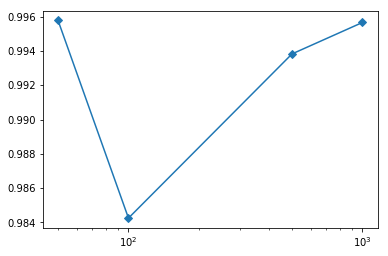

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [48]:
import tqdm

num_units = 5
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.5)

    fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))
    fidelities.append(fid)
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))


 25%|██▌       | 1/4 [00:12<00:37, 12.63s/it]

0.298996136808


 50%|█████     | 2/4 [00:24<00:25, 12.55s/it]

0.913126897567


 75%|███████▌  | 3/4 [00:36<00:12, 12.32s/it]

0.96150806699


100%|██████████| 4/4 [00:49<00:00, 12.35s/it]

0.948565339316


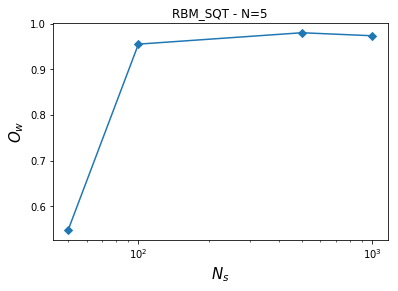

In [49]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.title('RBM_SQT - N={}'.format(num_units))
plt.xlabel('$N_s$', fontsize=15)
plt.ylabel('$O_w$', fontsize=15)
plt.show()